# Load and Visualize Globe Data 

In [1]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
globe_data = pandas.read_csv('dv_tree_heights_06-18-2020.csv') 
#read Globe data file
lat = globe_data['Latitude'].values.tolist()
long = globe_data['Longitude'].values.tolist()
height = globe_data['Measured Value'].values.tolist()
#convert data columnns into lists

In [2]:
globe_data.sort_values(by = 'Longitude', ascending = False) #by convention, we have chosen to sort by Longitude

,School Name,Site Name,Latitude,Longitude,Elevation,Measured At,Measured Value
19521,United States of America Citizen Science,60SXE555635,35.80332,178.72099,-4395.3,2020-01-15 20:48:00,8.89
10965,New Zealand Citizen Science,60HVB825143,-39.62088,176.79611,16.0,2019-06-26 03:50:00,4.31
10964,New Zealand Citizen Science,60HVD300313,-37.66281,176.20634,10.0,2019-06-20 23:42:00,7.91
10958,New Zealand Citizen Science,60HVC223167,-38.69491,176.10652,446.0,2020-01-12 23:19:00,15.88
10959,New Zealand Citizen Science,60HUE939220,-36.84195,175.81003,1.8,2019-04-23 20:41:00,1.98
...,...,...,...,...,...,...,...
7615,Innoko River School,School Location:BIO-01,62.60670,-159.51840,135.0,1999-10-20 00:00:00,5.00
7614,Innoko River School,School Location:BIO-01,62.60670,-159.51840,135.0,1998-10-01 00:00:00,5.50
7613,Innoko River School,School Location:BIO-01,62.60670,-159.51840,135.0,1998-10-01 00:00:00,12.30
7612,Innoko River School,School Location:BIO-01,62.60670,-159.51840,135.0,1998-09-29 00:00:00,7.20


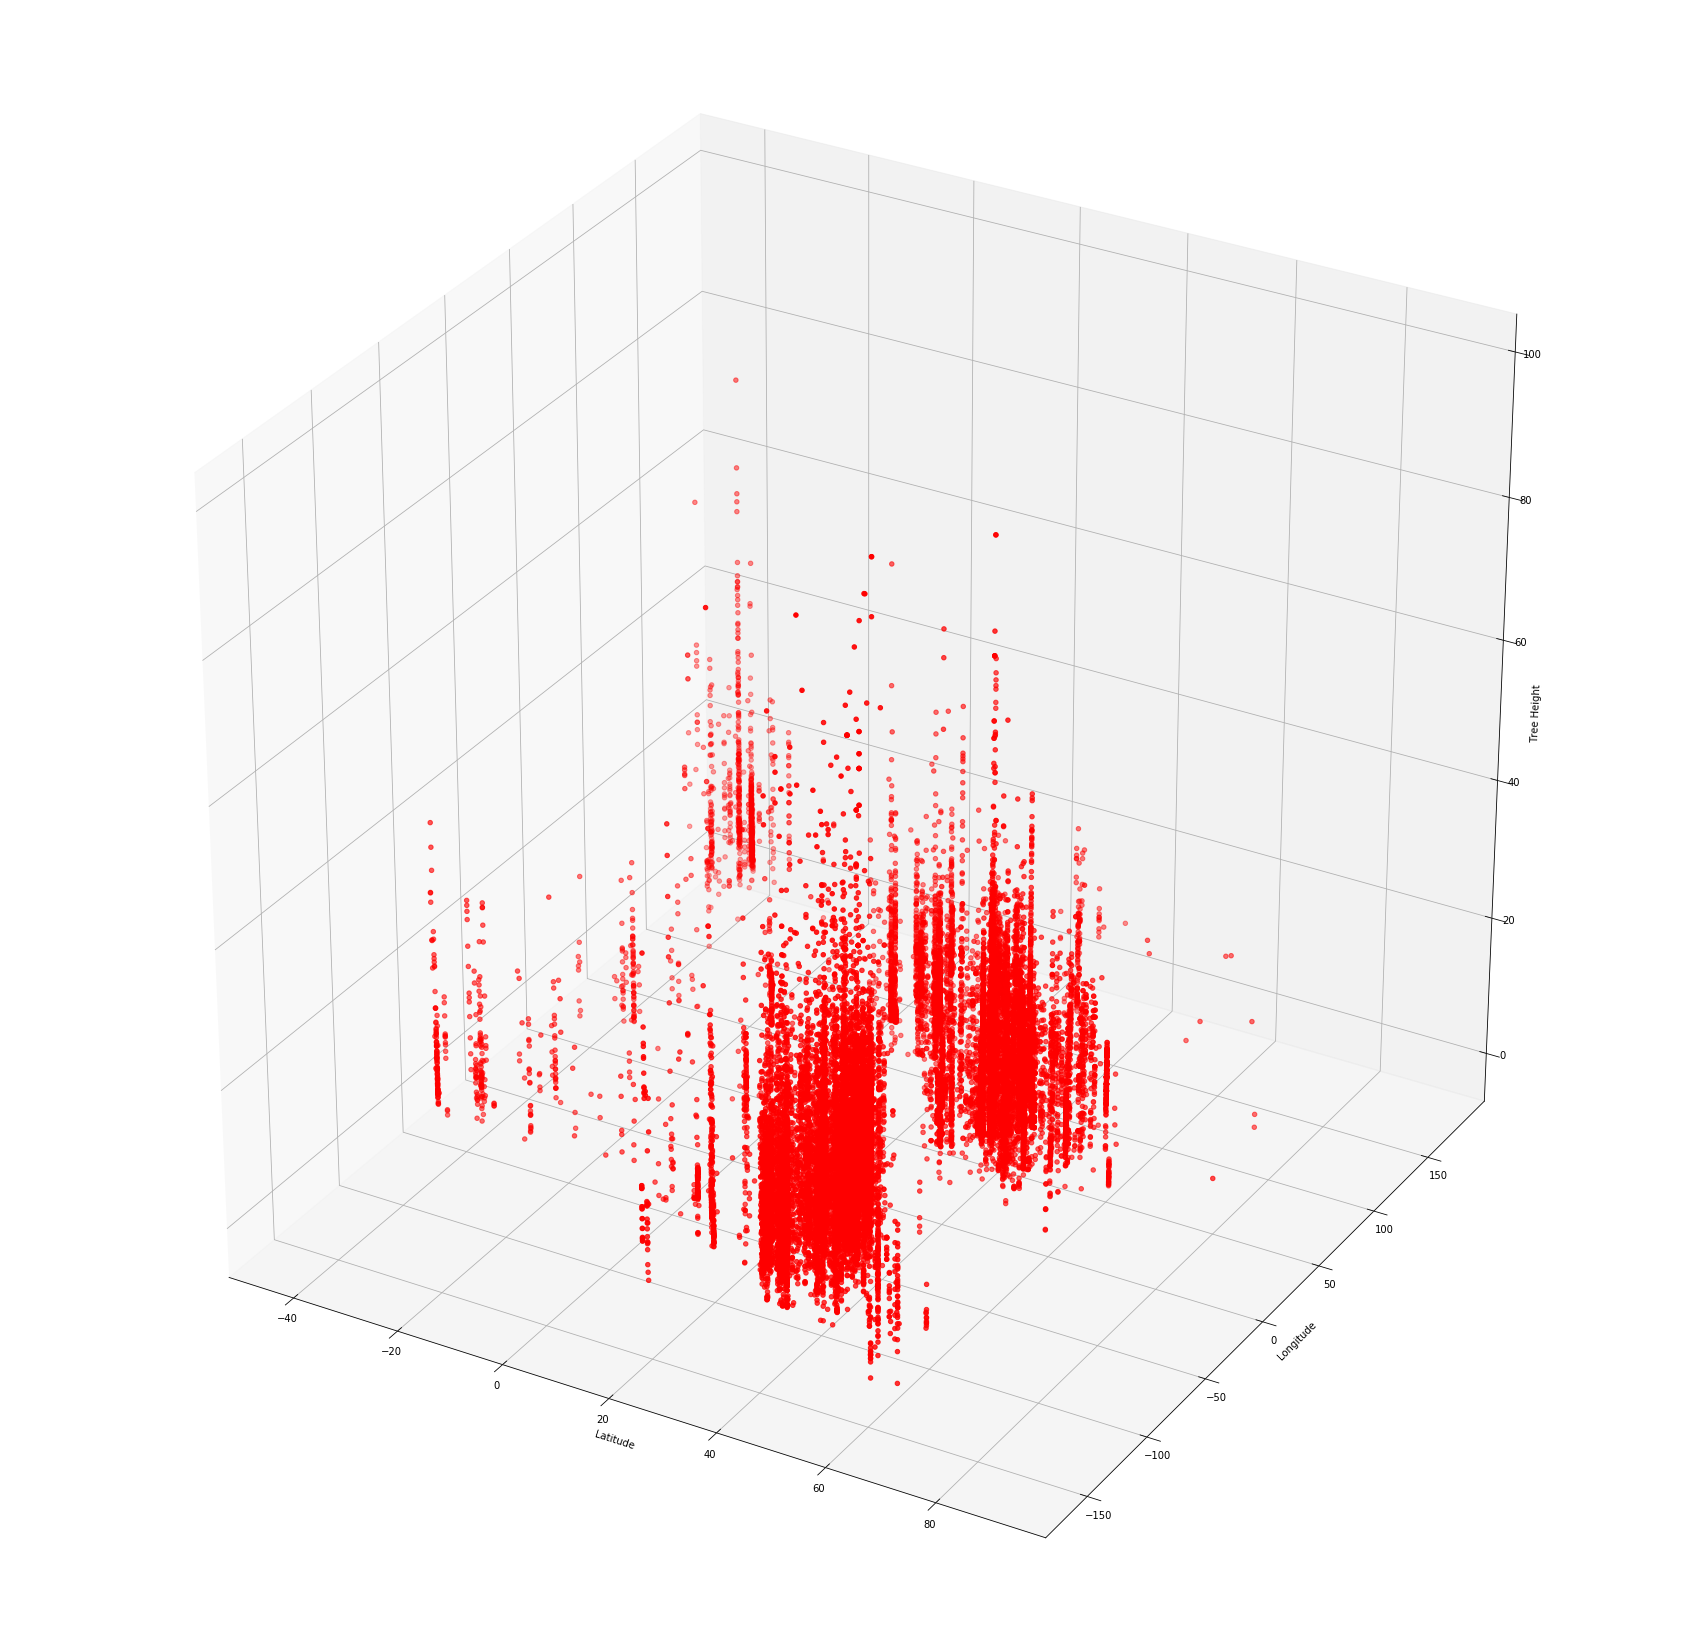

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = fig= plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')

x = lat
y = long
z = height

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Tree Height')

plt.show()
#this function represents a relationship between position (latitude, longitude) and tree height
#per earlier remarks, the data is indeed heavily clustered: let's divide the data up into k clusters

In [5]:
#The key observation is that the globe points are heavily clustered. Some regions are dense with 
#observations, whereas other regions are quite sparse. It therefore does not make sense for us to measure in a 
#uniform, grid-like pattern; rather, we need to sort the groups by clusters
#Once the data clusters are determined, we can divide the dataframes by clusters and run analysis on each
#homogenous cluster --> determine where error is largest
#Therefore, lets first build a dataframe of Globe observations
#which we can process using the k-means algorithm

# K Means Algorithm

In [6]:
Data = {'x': lat, 'y': long, 'z': height  }
#dictionary assigns x,y,z key values to lat, long, height

In [7]:
df = DataFrame(Data,columns=['x','y', 'z'])


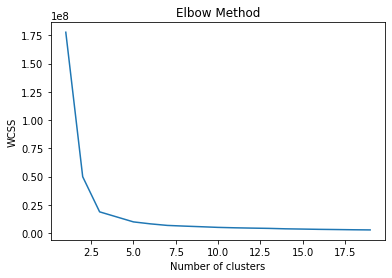

In [8]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#the Elbow Method is an analytic tool to determine the optimum number of clusters. The k-means algorithm 
#is based on Voronoi Tesselation, a technique which minimizes deviation within clusters relative to deviation 
#among clusters. Tne clusters are therefore homogenous sets which are heterogenous relative to each other.

#the 'elbow' of the graph is the optimum number of clusters --> much beyond this cluster will be considered
#overfitting --> between 3 and 5 is the optimal number of clusters. To be safe, we will work with 5



[[  36.06683597  -80.67557243   16.60618778]
 [  46.70146942   16.86964478   16.31040479]
 [ -35.25491893  160.81041677   13.23919478]
 [  18.70627273   96.85306249   10.39578719]
 [  40.38274032 -120.39400416   15.44502938]]


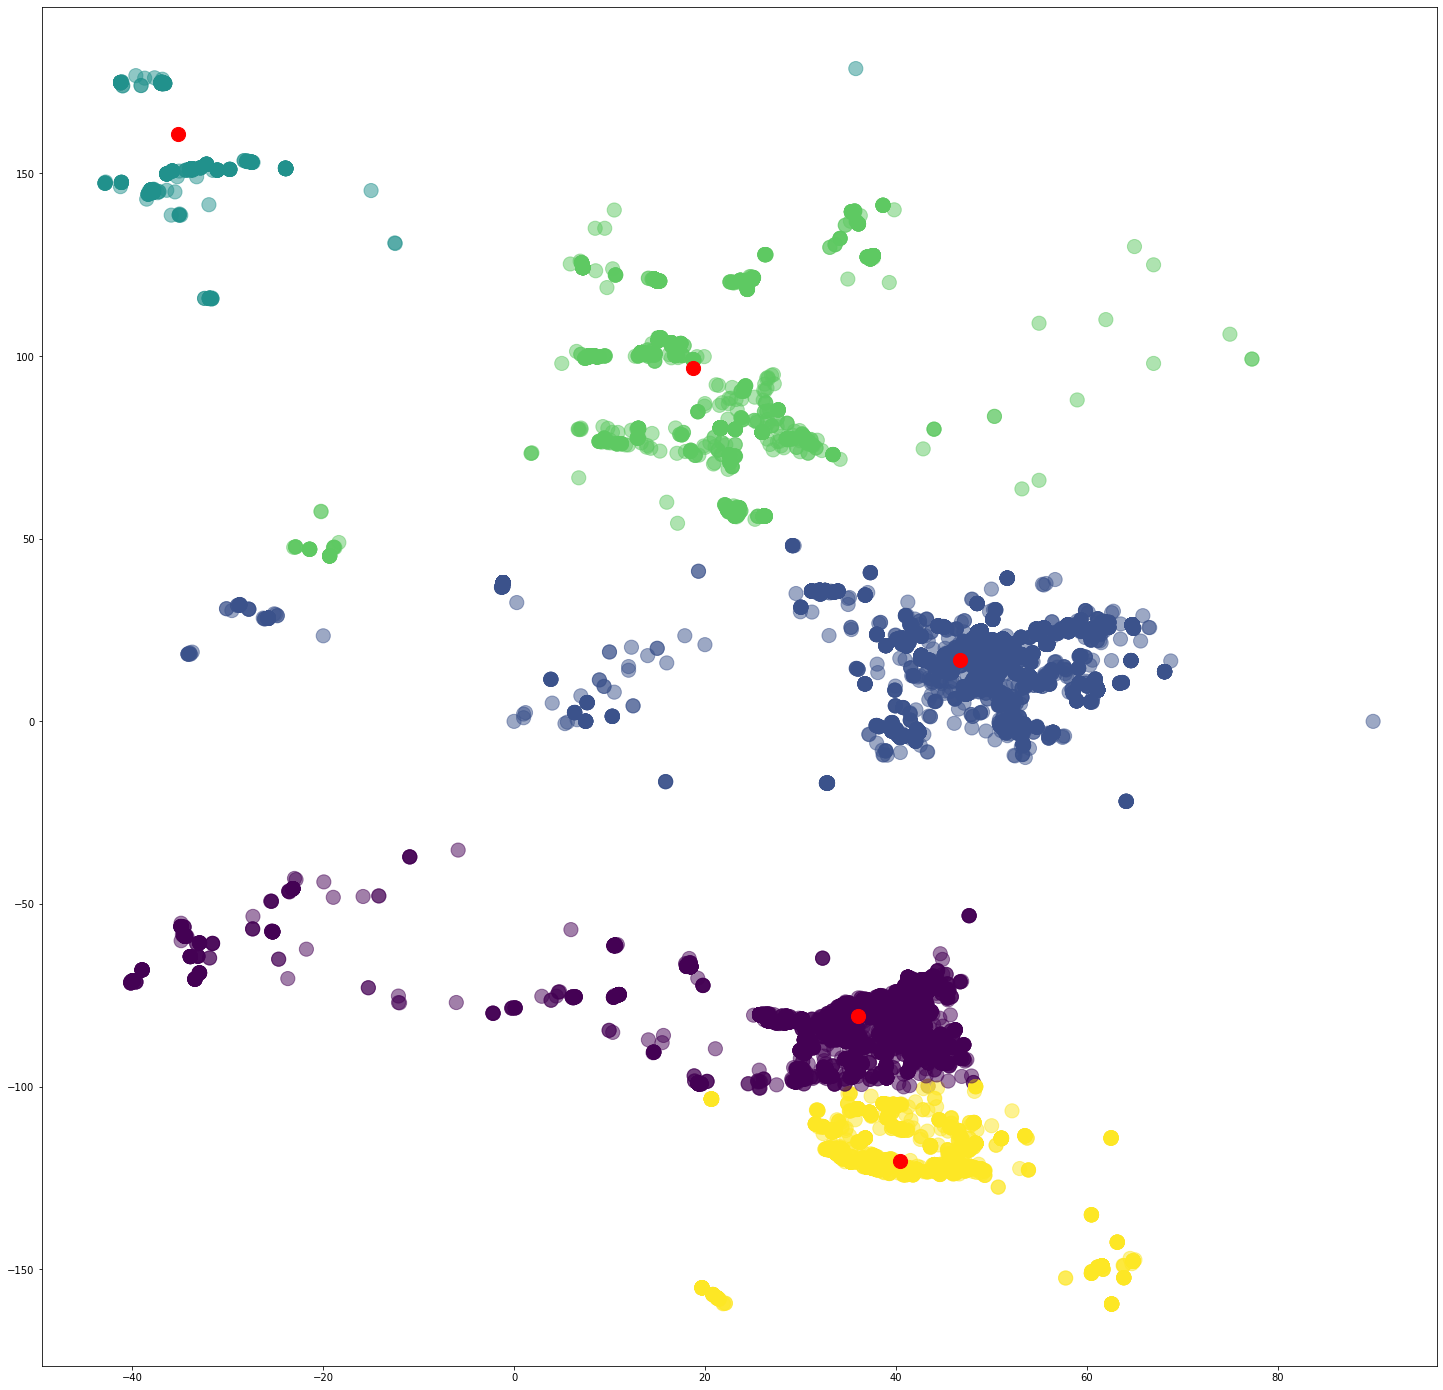

In [9]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
#centroids are the relative cluster centers
fig= plt.figure(figsize=(25,25))
plt.scatter(df['x'], df['y'],  c= kmeans.labels_.astype(float), s=200, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s = 200)

plt.show()

In [10]:
#we observe that the clusters are 'relatively' homogenous along longitudal lines
#we can therefore divide the Globe data into dataframes defined by the above longitudal / latitudal constraints

# Process Globe Data into Specific Data Frames

In [11]:
#we found from the k means algorithm that the Globe Data is clustered by pockets
#we want to break up the Globe data by boolean clusters so that we may compare homogenous regions against similar
#regions of ICE data

In [23]:
data_frame_one = globe_data[globe_data['Longitude'] >= 105 ]
data_frame_one = data_frame_one[data_frame_one['Latitude'] < -20 ]
#data frame one refers to the green cluster in the upper left corner

In [24]:
data_frame_two_a = globe_data[globe_data['Longitude'] >= 105 ]
data_frame_two_a = data_frame_two_a[data_frame_two_a['Latitude'] > -20 ]
data_frame_two_b = globe_data[globe_data['Longitude'] >= 45 ]
data_frame_two_b = data_frame_two_b[data_frame_two_b['Longitude'] <105 ]
frames = [data_frame_two_a, data_frame_two_b]
data_frame_two = pandas.concat(frames)
#data frame two refers to the turquoise cluster both adjacent to and below data frame one


In [25]:
data_frame_three = globe_data[globe_data['Longitude'] >=-30 ]
data_frame_three = data_frame_three[data_frame_three['Longitude'] < 45 ] #data frame 3 ranges from -30 to 45
#data frame three is the dark blue central cluster

In [26]:
data_frame_four = globe_data[globe_data['Longitude'] >=-105 ]
data_frame_four = data_frame_four[data_frame_four['Longitude'] < -30]
#data frame four is the purple cluster, second from the bottom

In [27]:
data_frame_five = globe_data[globe_data['Longitude'] <-105 ] 
#data frame five is the bottom-most cluster

# Convert Globe Data Frame into Dictionaries

In [28]:
#the decision to store the dataframes into dictionaries had several underlying reasons:
#underlying structure of dictionaries makes it algorithmically much more efficient to run a search 
#algorithm versus an array
#(lat, long) as a tuple key made sense, because this is the primary comparison metric
#height as the value made sense, as this is the core value we want to understand differences between with regards
#to ICESat-2 and Globe Data
#Therefore, with regard to both storage and retrieval, dictionaries make sense.

In [29]:
def round_item(sample_list):
    i = 0
    while i < len(sample_list):
        
        sample_list[i] = round(sample_list[i], 3)
        i = i + 1
    return sample_list
#this is necessary to ensure every value which is 

In [30]:
#given a data frame, we want to return a dictionary that stores lat, long as a tuple that associates 
#to some tree height
def dataframe_to_dictionary(data_frame):
    dictionary = {}
    lat_list = data_frame['Latitude'].values.tolist()
    round_item(lat_list)
    long_list = data_frame['Longitude'].values.tolist()
    round_item(long_list)
    height_list = data_frame['Measured Value'].values.tolist()
    #convert the data frame into lists based on lat, long, height
    i = 0
    while i < len(lat_list):
        #iterate through each of these lists
        dummy_tuple = (lat_list[i], long_list[i])
        #create a tuple that stores lat, long
        dictionary[dummy_tuple] = height_list[i]
        #make this tuple a key in a dictionary, and assign to the key a value, the corresponding height
        i = i + 1
    return dictionary

In [31]:
globe_dict_one = dataframe_to_dictionary(data_frame_one)

In [32]:
globe_dict_two = dataframe_to_dictionary(data_frame_two)

In [33]:
globe_dict_three = dataframe_to_dictionary(data_frame_three)

In [34]:
globe_dict_four = dataframe_to_dictionary(data_frame_four)

In [35]:
globe_dict_five = dataframe_to_dictionary(data_frame_five)

In [36]:
#we now have five Globe cluster regions stored as dictionaries. We can implement a function to compare Globe values
#against ICE values located in the same locations and determine the error between the two data sets

# Load Ice Data

In [37]:
ice_data_one = pandas.read_csv('ice_elev_day_one.csv')
ice_data_two = pandas.read_csv('ice_elev_day_two.csv') 
ice_data_three = pandas.read_csv('ice_elev_day_three.csv')
ice_data_four = pandas.read_csv('ice_elev_day_four.csv') 
ice_data_five = pandas.read_csv('ice_elev_day_five.csv') 
ice_data_six = pandas.read_csv('ice_elev_day_six.csv') 
ice_data_seven = pandas.read_csv('ice_elev_day_seven.csv')
ice_data_eight = pandas.read_csv('ice_elev_day_eight.csv')
ice_data_nine = pandas.read_csv('ice_elev_day_nine.csv') 
ice_data_ten = pandas.read_csv('ice_elev_day_ten.csv')
ice_frame = [ice_data_one, ice_data_two, ice_data_three, ice_data_four, ice_data_five,
            ice_data_six, ice_data_seven, ice_data_eight, ice_data_nine, ice_data_ten]
ice_data = pandas.concat(ice_frame)
ice_data = ice_data[ice_data['h_canopy']>0]


In [38]:
#we need to find a more efficient way to pull massive quantities of data: currently, the only .csv
#option presently available comes in a day by day form --> we will solve this problem later
#as for now, we have concatenated 10 days worth of data, and are only concerned with data that has non-zero
#tree heights

In [39]:
#given a data frame, we want to return a dictionary that stores lat, long as a tuple that associates 
#to some tree height
def dataframe_to_dictionary_ice(data_frame):
    dictionary = {}
    lat_list = data_frame['latitude'].values.tolist()
    round_item(lat_list)
    long_list = data_frame['longitude'].values.tolist()
    round_item(long_list)
    height_list = data_frame['h_canopy'].values.tolist()
    #convert the data frame into lists based on lat, long, height
    i = 0
    while i < len(lat_list):
        #iterate through each of these lists
        dummy_tuple = (lat_list[i], long_list[i])
        #create a tuple that stores lat, long
        dictionary[dummy_tuple] = height_list[i]
        #make this tuple a key in a dictionary, and assign to the key a value, the corresponding height
        i = i + 1
    return dictionary

In [40]:
ice_dict = dataframe_to_dictionary_ice(ice_data)

# Cost Function Analysis

In [41]:
def cost_function(dict_ones, dict_twos):
    value_sum = 0
    sum_counter = 0
    for key in dict_ones:
        for item in dict_twos:
            if key == item:
                value_sum = value_sum + (dict_ones[key] - dict_twos[key])**2
                sum_counter = sum_counter + 1
    if sum_counter > 0:
        value_sum = value_sum / sum_counter
        value_sum = math.sqrt(value_sum)
    
    return value_sum

#this function takes two dictionaries
#It says: if these dictionaries have equal keys, find the cost associated with the difference of the keys' values
#you need to square and then take the square root --> Euclidean distance
#you divide by the sum_counter, which is the number of observations which go into the sum, to find the average
#Euclidean distance

In [42]:
import math

In [43]:
#lets try out the cost function, J(theta), on each Globe dictionary with the ICE dictionary

In [44]:
cost_function(globe_dict_one, ice_dict)

0

In [45]:
cost_function(globe_dict_two, ice_dict)

0

In [46]:
cost_function(globe_dict_three, ice_dict)

10.466566000000002

In [47]:
cost_function(globe_dict_four, ice_dict)

0

In [48]:
cost_function(globe_dict_five, ice_dict)

0

In [49]:
#interesting --> with four degrees of precision, it seems there are no equivalent values. let us go to three degrees
#of precision
#with 3 degrees of precision, success! The cost function works!

In [50]:
#this is to be expected! Only the third globe cluster intersected with the ice data. it is interesting that the error
#is so high, however --> let us adjust for outliers / adjust degrees of precision and see how the error is affected

In [51]:
#next steps:
#access a MUCH larger combination of ICESat-2 data
#compare dictionaries of corresponding clusters
#determine the average error, per point, per cluster
#thesis --> with more points, the cost function will converge to smaller and smaller values